In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

# 데이터 프레임 생성
data = pd.DataFrame({'Date':dates, 'Value': values})
print(data)

# 결측치 생성

data.loc[100:200, 'Value'] = np.nan
print(data.loc[100:200])

          Date     Value
0   2023-01-01  0.496714
1   2023-01-02 -0.138264
2   2023-01-03  0.647689
3   2023-01-04  1.523030
4   2023-01-05 -0.234153
..         ...       ...
995 2025-09-22 -0.281100
996 2025-09-23  1.797687
997 2025-09-24  0.640843
998 2025-09-25 -0.571179
999 2025-09-26  0.572583

[1000 rows x 2 columns]
          Date  Value
100 2023-04-11    NaN
101 2023-04-12    NaN
102 2023-04-13    NaN
103 2023-04-14    NaN
104 2023-04-15    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[101 rows x 2 columns]


In [9]:
# ARIMA 모델 적합
model = ARIMA(data['Value'].dropna(),order=(1,1,1))
model_fit = model.fit()

# 결측치 예측
predicted_values = model_fit.predict(start=100, end=2000)

# 결측치 대체
data.loc[100:200, 'Value_arima'] = predicted_values
print(data.loc[100:200])

C:\Users\noeyx\anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\noeyx\anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\noeyx\anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


          Date  Value  Value_arima
100 2023-04-11    NaN    -0.103568
101 2023-04-12    NaN    -0.095798
102 2023-04-13    NaN    -0.083315
103 2023-04-14    NaN    -0.072096
104 2023-04-15    NaN    -0.088166
..         ...    ...          ...
196 2023-07-16    NaN    -0.028432
197 2023-07-17    NaN    -0.027399
198 2023-07-18    NaN    -0.022167
199 2023-07-19    NaN    -0.018896
200 2023-07-20    NaN    -0.025205

[101 rows x 3 columns]


C:\Users\noeyx\anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\noeyx\anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


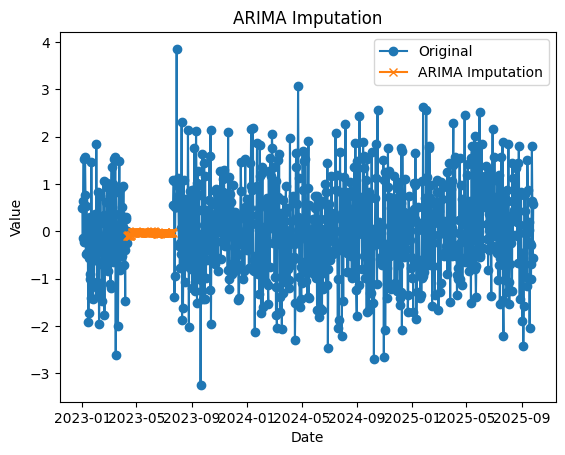

In [10]:
# 시계열 데이터 시각화 
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_arima'], 'x-', label='ARIMA Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Imputation')
plt.legend()
plt.show()